<a href="https://colab.research.google.com/github/krafime/IOT-Signal-and-Data-Filering/blob/main/IOT_Tugas_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

Fungsi butter, lfilter, dan freqz adalah bagian dari modul scipy.signal di Python. Fungsi-fungsi ini digunakan untuk pemrosesan sinyal digital, khususnya untuk merancang dan menerapkan filter digital pada sinyal. Fungsi butter digunakan untuk merancang filter Butterworth, yang merupakan jenis filter low-pass. Fungsi lfilter digunakan untuk menerapkan filter pada sinyal, dan fungsi freqz digunakan untuk menghitung respons frekuensi dari filter.


In [ ]:
# Download the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00507/wisdm-dataset.zip'
filename = 'wisdm-dataset.zip'
!wget $url
!unzip $filename

In [ ]:
# Load the dataset
filename = 'wisdm-dataset/raw/watch/gyro/data_1606_gyro_watch.txt'
df = pd.read_csv(filename, header=None, names=['user_id', 'activity', 'timestamp', 'x', 'y', 'z'])
df

,user_id,activity,timestamp,x,y,z
0,1606,A,802236442795351,0.578338,-2.203759,1.7054167;
1,1606,A,802236492295351,-0.106627,-0.912658,2.8559022;
2,1606,A,802236541795351,-1.531950,-1.196019,3.5003872;
3,1606,A,802236591295351,-0.662695,-1.711606,4.41758;
4,1606,A,802236640795351,-1.212371,-1.869266,4.733964;
...,...,...,...,...,...,...
64849,1606,S,804164336303918,-0.788573,-1.408356,-1.039483;
64850,1606,S,804164386235288,-1.369142,-0.822460,-1.4368266;
64851,1606,S,804164436166658,-0.734244,-0.232304,-1.2919506;
64852,1606,S,804164486098028,-2.039193,0.209781,-1.495416;


In [ ]:
# Filter requirements.
order = 6
fs = 20.0       # sample rate, Hz
cutoff = 3.0    # desired cutoff frequency of the filter, Hz

In [ ]:
# Low pass filter
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [ ]:
# Moving average filter
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

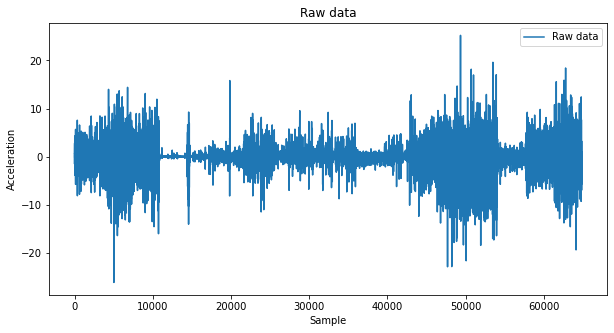

In [ ]:
# Plot raw data
plt.figure(figsize=(10, 5))
plt.plot(df['x'], label='Raw data')
plt.title('Raw data')
plt.xlabel('Sample')
plt.ylabel('Acceleration')
plt.legend()
plt.show()

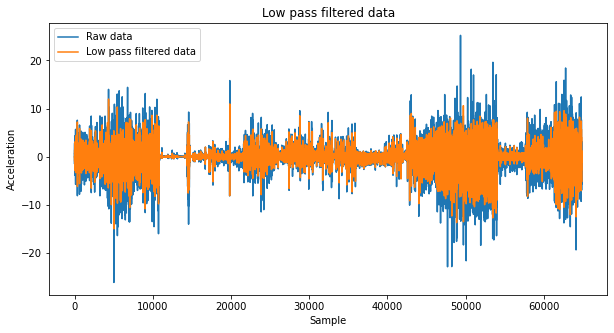

In [ ]:
# Plot low pass filtered data
b, a = butter_lowpass(cutoff, fs, order)
y = butter_lowpass_filter(df['x'], cutoff, fs, order)
plt.figure(figsize=(10, 5))
plt.plot(df['x'], label='Raw data')
plt.plot(y, label='Low pass filtered data')
plt.title('Low pass filtered data')
plt.xlabel('Sample')
plt.ylabel('Acceleration')
plt.legend()
plt.show()

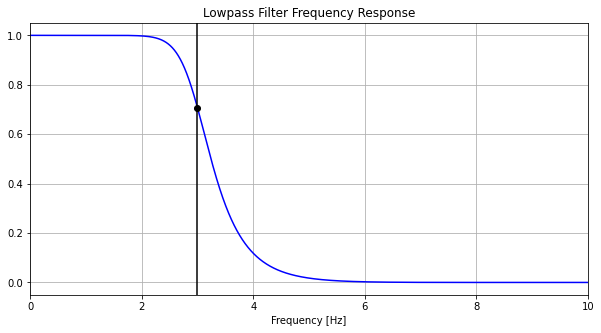

In [ ]:
# Determine the cutoff frequency for low pass filter
plt.figure(figsize=(10, 5))
plt.clf()
w, h = freqz(b, a, worN=8000)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.show()

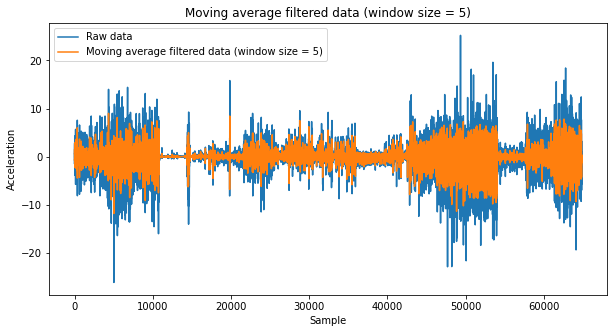

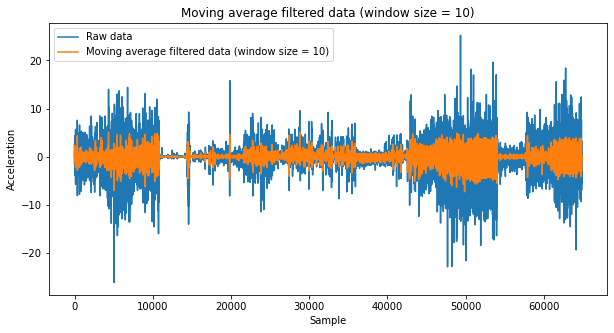

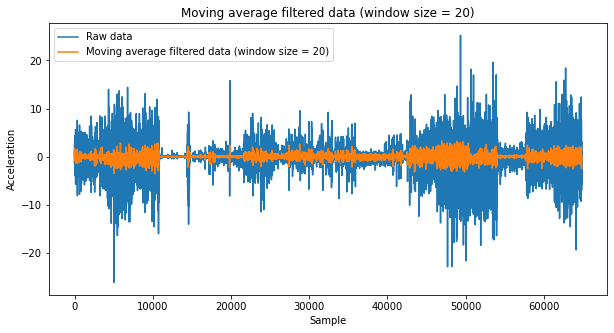

In [ ]:
# Plot moving average filtered data
windows = [5, 10, 20]
for w in windows:
    y = moving_average(df['x'], w)
    plt.figure(figsize=(10, 5))
    plt.plot(df['x'], label='Raw data')
    plt.plot(y, label=f'Moving average filtered data (window size = {w})')
    plt.title(f'Moving average filtered data (window size = {w})')
    plt.xlabel('Sample')
    plt.ylabel('Acceleration')
    plt.legend()
    plt.show()